# **`K MEANS Clustering Algorithms Implementation`**

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
X , y  = make_blobs(n_samples = 1000, centers = 3 , n_features = 2 , random_state= 23)

In [3]:
X

array([[-5.37039106,  3.47555168],
       [ 5.84161203, -3.98182959],
       [ 1.76127766,  9.39696306],
       ...,
       [ 6.14147823, -5.75491603],
       [-5.45330839,  1.75599573],
       [-0.21966953,  8.72922042]])

In [4]:
y # we will not use y because it is unsupervised machine learning

array([2, 1, 0, 2, 1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 1, 2, 2, 2, 1, 1, 0, 1,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 1, 2, 1, 0, 1, 2, 2, 1, 0, 1, 1, 2,
       2, 1, 0, 2, 1, 1, 2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 1, 2, 2, 0, 1, 2,
       1, 2, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1,
       0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1,
       0, 0, 2, 1, 1, 2, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2,
       0, 0, 2, 1, 1, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0,
       2, 2, 2, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 1,
       1, 2, 0, 2, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 2, 1, 2, 1, 0, 2, 0, 0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 0, 0,
       1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 0,
       0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 2, 2, 1, 1, 1,

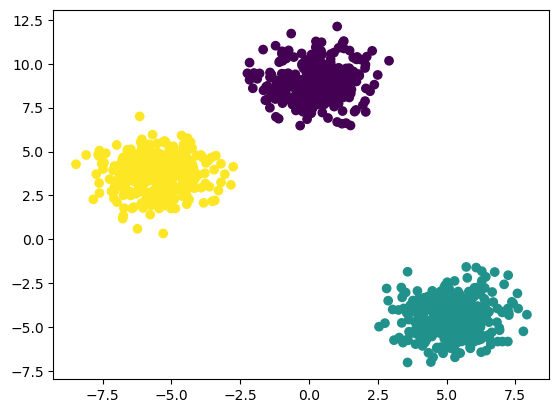

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [7]:
from sklearn.cluster import KMeans

In [8]:
## Elbow method to select the K-value
wcss = []
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_) ## This contains the wcss values (within cluster sum of squares)

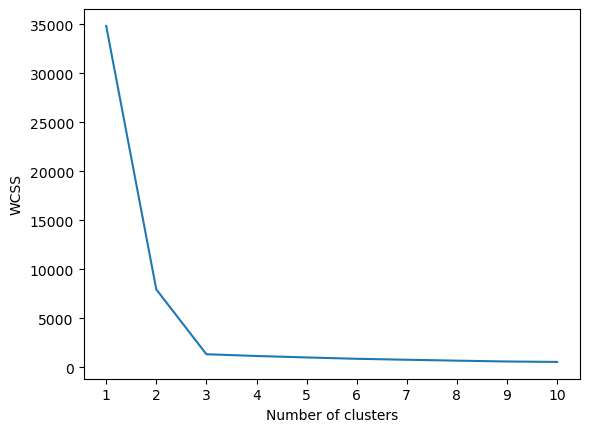

In [9]:
#plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [10]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [11]:
y_labels = kmeans.fit_predict(X_train)

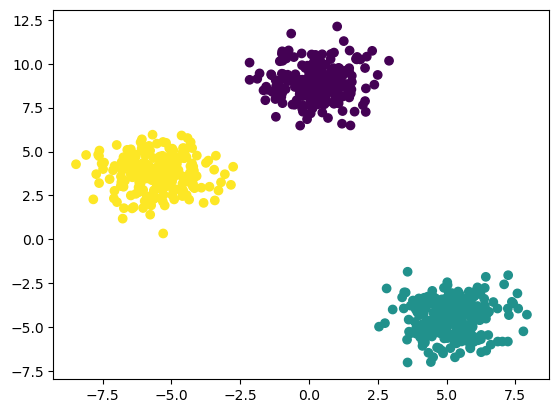

In [12]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [15]:
from kneed import KneeLocator

In [19]:
k1 = KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [20]:
k1.elbow

3

In [25]:
### Sillhouette score
from sklearn.metrics import silhouette_score
silhouette_coeffectinets = []
for k in range(2,11): ## minimum k value should be 2 for silhouette score
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score = silhouette_score(X_train,kmeans.labels_)
    silhouette_coeffectinets.append(score)

In [26]:
silhouette_coeffectinets

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.4817150007325673,
 0.33727775723886533,
 0.3442959350461067,
 0.3423644072185359,
 0.344336391430319,
 0.34043105479248803]

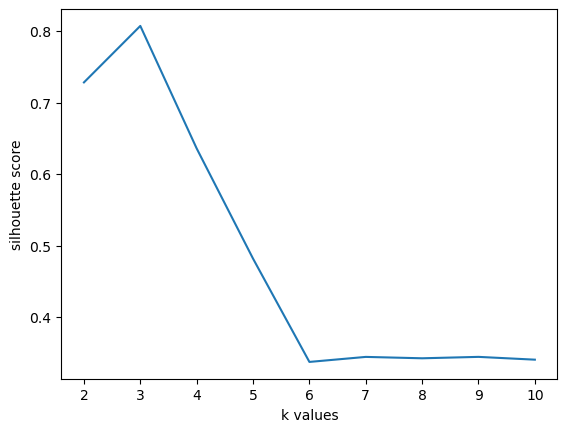

In [30]:
plt.plot(range(2,11),silhouette_coeffectinets)
plt.xticks(range(2,11))
plt.xlabel("k values")
plt.ylabel("silhouette score")
plt.show()

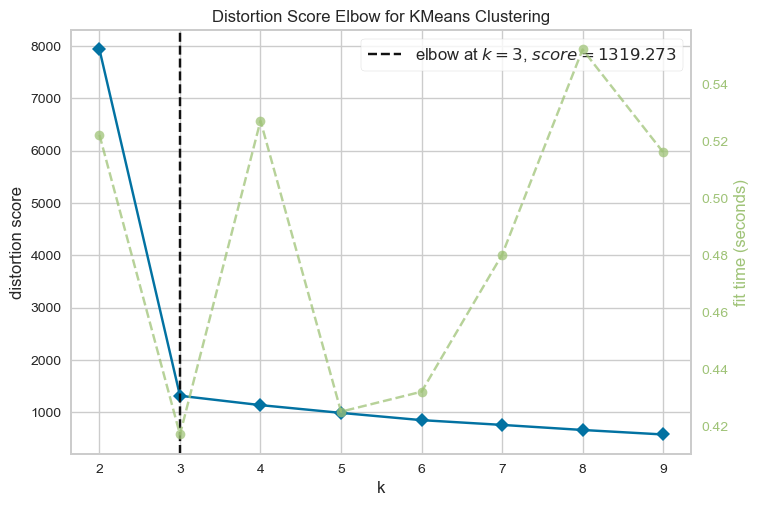

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
### Additional using yellowbrick
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10)) # we can also change the default metric from distorsion score to silhouette or calinski_harabasz

visualizer.fit(X_train)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure